In [23]:
# load a MRI image and print its shape
import nibabel as nib

path = "MR_00008.nii.gz"
img = nib.load(path)
data = img.get_fdata()
print(data.shape)

(256, 256, 140)


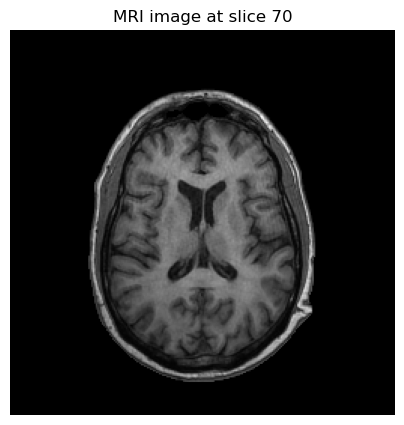

In [24]:
# plot the central slice of the image
import matplotlib.pyplot as plt
import numpy as np

slice_idx = int(data.shape[2] / 2)
plt.figure(figsize=(5, 5))
slice = data[:, :, slice_idx]
slice = np.rot90(slice)
plt.imshow(slice, cmap="gray")
plt.axis('off')
plt.title("MRI image at slice {}".format(slice_idx))
plt.show()

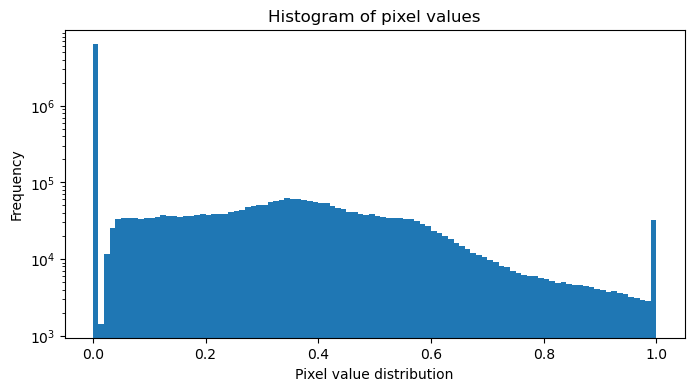

In [25]:
# now we need to normalize the pixel values from 0 to 3000 to 0 to 1

data = np.clip(data, 0, 3000)
data = data / 3000

# plot a histogram of the pixel values and use log scale for the y-axis
plt.figure(figsize=(8, 4))
plt.hist(data.flatten(), bins=100)
plt.xlabel("Pixel value distribution")
plt.ylabel("Frequency")
plt.title("Histogram of pixel values")
plt.yscale("log")
plt.show()

In [26]:
# now we need to find a mask for the brain
# we will use the Otsu thresholding method to find the brain mask
from skimage.filters import threshold_otsu

data_mask = data > threshold_otsu(data)


In [27]:
def plot_img_and_mask(img, mask):
    plt.figure(figsize=(5, 5))
    img = np.rot90(img)
    mask = np.rot90(mask)
    plt.imshow(img, cmap="gray")
    plt.imshow(mask, cmap="Reds", alpha=0.5)
    plt.axis('off')
    plt.title("MRI image with mask")
    plt.show()

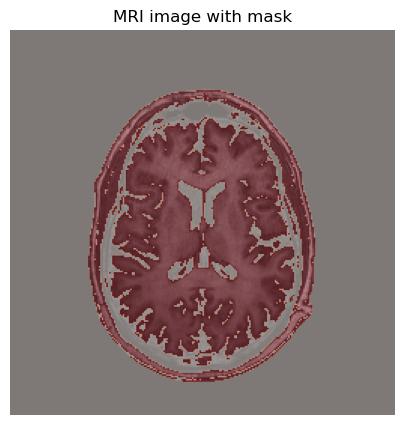

In [28]:
# the error message shows "AttributeError: module 'numpy' has no attribute 'bool'. `np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here. The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:"

# so we need to change the data type of the mask to bool

data_mask = data_mask.astype(bool)
# plot the mask in red with alpha = 0.5 to see the overlap with the image
plot_img_and_mask(data[:, :, slice_idx], data_mask[:, :, slice_idx])

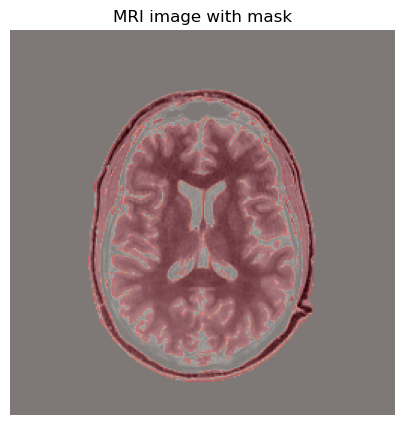

In [29]:
# inverse the pixel value inside the mask, and use the lambda function to do
# keep the pixel value outside the mask unchanged

data_inverted = np.where(data_mask, 1 - data, data)
plot_img_and_mask(data_inverted[:, :, slice_idx],
                  data_mask[:, :, slice_idx])


In [31]:
# save the inverse mask as a nifti file

img = nib.Nifti1Image(data_inverted, img.affine, img.header)
nib.save(img, "MR_00008_inv.nii.gz")